In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\sarav\Documents\EDA\datasets\eurusd\eurusd_d1.csv")

In [3]:
del df['Unnamed: 0']
del df['tick_volume']
del df['spread']

In [4]:
df_original = df

del df['open']
del df['high']
del df['low']

In [5]:
df['SMA10'] = df['close'].rolling(10).mean()
df['SMA20'] = df['close'].rolling(20).mean()

In [6]:
df.isna().sum()

time            0
close           0
real_volume     0
SMA10           9
SMA20          19
dtype: int64

In [7]:
df['SMA10'].head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     1.281659
10    1.278821
11    1.275713
12    1.274882
13    1.276644
14    1.278754
15    1.281198
16    1.283793
17    1.287705
18    1.290614
19    1.296049
Name: SMA10, dtype: float64

In [8]:
df['SMA20'].head(30)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19    1.288854
20    1.289887
21    1.290072
22    1.291240
23    1.293011
24    1.295198
25    1.296969
26    1.299422
27    1.302138
28    1.304494
29    1.307095
Name: SMA20, dtype: float64

In [9]:
df

,time,close,real_volume,SMA10,SMA20
0,2012-01-02,1.29338,0,NaN,NaN
1,2012-01-03,1.30509,0,NaN,NaN
2,2012-01-04,1.29361,0,NaN,NaN
3,2012-01-05,1.27904,0,NaN,NaN
4,2012-01-06,1.27188,0,NaN,NaN
...,...,...,...,...,...
2590,2021-12-27,1.13269,0,1.129818,1.130209
2591,2021-12-28,1.13085,0,1.130322,1.130059
2592,2021-12-29,1.13473,0,1.130853,1.130200
2593,2021-12-30,1.13257,0,1.130804,1.130320


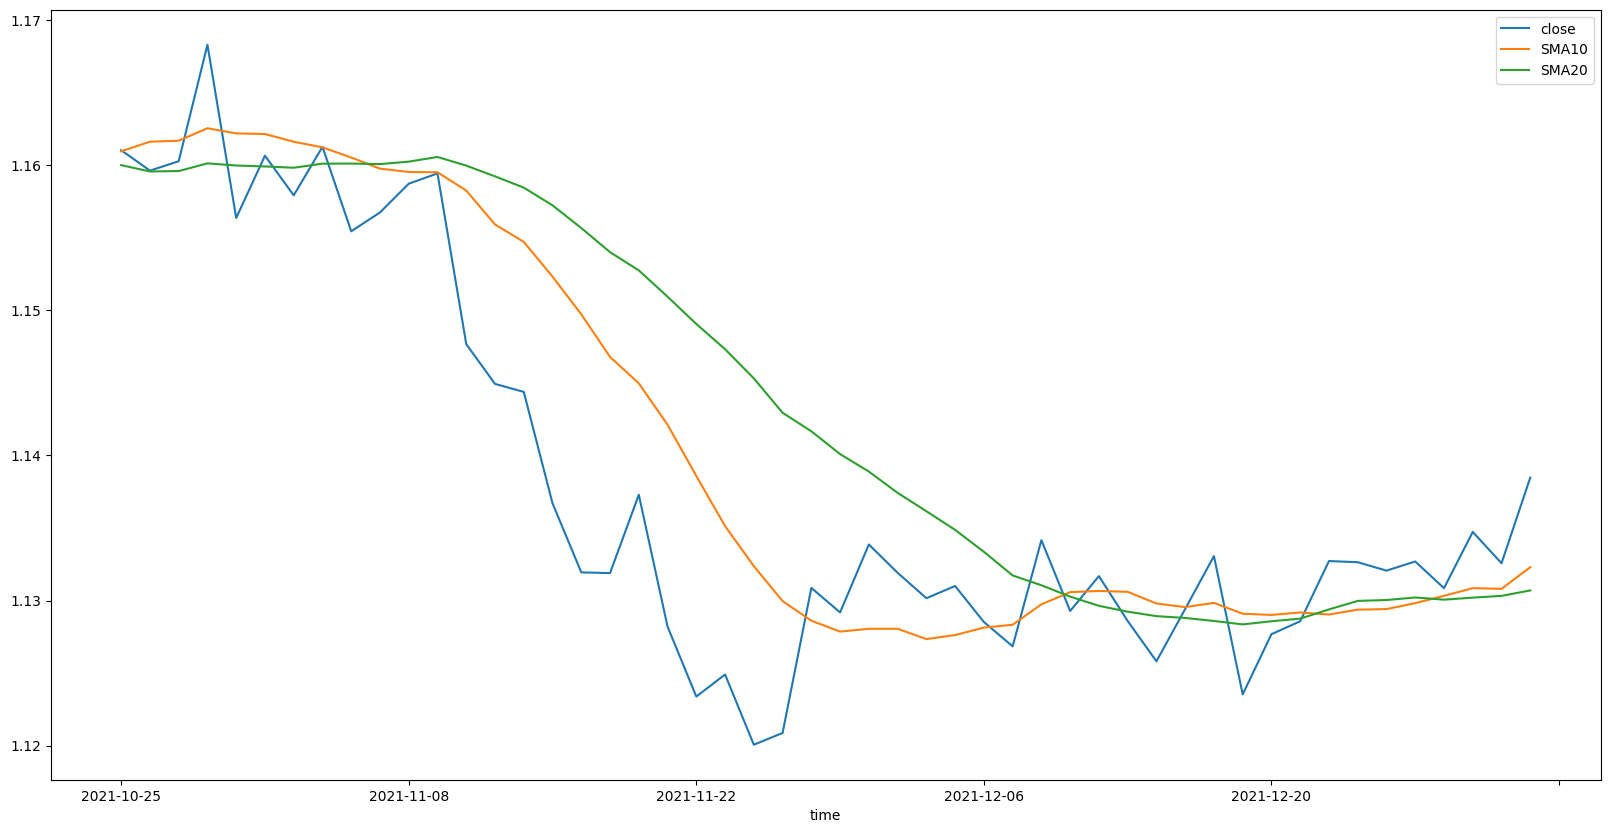

In [10]:
df[['close','SMA10','SMA20','time']].tail(50).plot(figsize=(20,10),x='time')
plt.show()

In [11]:
def signal(raw):
    
    if raw['SMA10'] > raw['SMA20']:
        return 1
    elif raw['SMA10']  < raw['SMA20']:
        return 0
    else :
        return np.NaN

df['Signal'] = df.apply(signal,axis=1)

In [12]:
df['Signal'].value_counts()

0.0    1318
1.0    1258
Name: Signal, dtype: int64

In [13]:
df['Signal-Filtered'] = df['Signal'][df['Signal'] != df['Signal'].shift()]

In [14]:
df['Signal-Price(BUY)'] = df['close'][df['Signal-Filtered'] == 1]
df['Signal-Price(SELL)'] = df['close'][df['Signal-Filtered'] == 0]

In [15]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL)
2545,2021-10-25,1.16104,0,1.160964,1.160011,1.0,1.0,1.16104,NaN
2546,2021-10-26,1.15963,0,1.161626,1.159574,1.0,NaN,NaN,NaN
2547,2021-10-27,1.16028,0,1.161694,1.159601,1.0,NaN,NaN,NaN
2548,2021-10-28,1.16831,0,1.162552,1.160132,1.0,NaN,NaN,NaN
2549,2021-10-29,1.15637,0,1.162197,1.159984,1.0,NaN,NaN,NaN
2550,2021-11-01,1.16066,0,1.162155,1.159919,1.0,NaN,NaN,NaN
2551,2021-11-02,1.15793,0,1.161622,1.159830,1.0,NaN,NaN,NaN
2552,2021-11-03,1.16127,0,1.161236,1.160111,1.0,NaN,NaN,NaN
2553,2021-11-04,1.15545,0,1.160535,1.160117,1.0,NaN,NaN,NaN
2554,2021-11-05,1.15675,0,1.159769,1.160082,0.0,0.0,NaN,1.15675


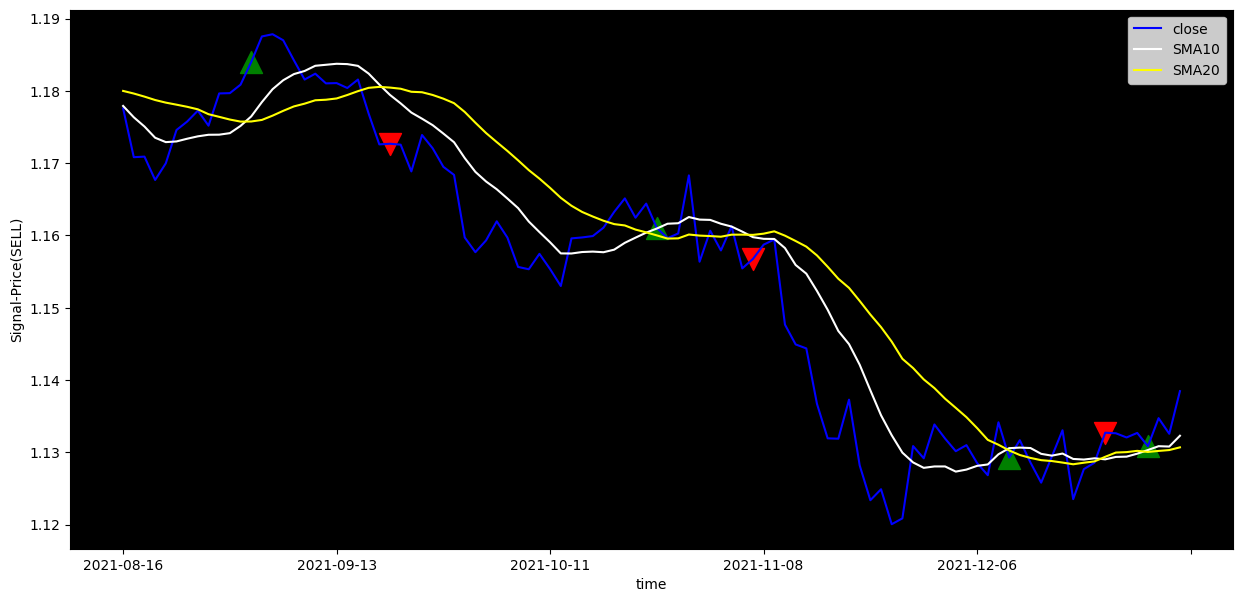

In [16]:
ax = df[['close','SMA10','SMA20','time']].tail(100).plot(x='time',legend=True,figsize=(15, 7),color=['blue','white','yellow'])
df[['time','Signal-Price(BUY)']].tail(100).plot(x='time',y='Signal-Price(BUY)',kind='scatter',ax=ax,marker='^',secondary_y=True,color='green',legend='True',s=250)
df[['time','Signal-Price(SELL)']].tail(100).plot(x='time',y='Signal-Price(SELL)',kind='scatter',ax=ax,marker='v',secondary_y=True,color='red',legend='True',s=250)
ax.set_facecolor('black')
plt.show()

In [17]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL)
2545,2021-10-25,1.16104,0,1.160964,1.160011,1.0,1.0,1.16104,NaN
2546,2021-10-26,1.15963,0,1.161626,1.159574,1.0,NaN,NaN,NaN
2547,2021-10-27,1.16028,0,1.161694,1.159601,1.0,NaN,NaN,NaN
2548,2021-10-28,1.16831,0,1.162552,1.160132,1.0,NaN,NaN,NaN
2549,2021-10-29,1.15637,0,1.162197,1.159984,1.0,NaN,NaN,NaN
2550,2021-11-01,1.16066,0,1.162155,1.159919,1.0,NaN,NaN,NaN
2551,2021-11-02,1.15793,0,1.161622,1.159830,1.0,NaN,NaN,NaN
2552,2021-11-03,1.16127,0,1.161236,1.160111,1.0,NaN,NaN,NaN
2553,2021-11-04,1.15545,0,1.160535,1.160117,1.0,NaN,NaN,NaN
2554,2021-11-05,1.15675,0,1.159769,1.160082,0.0,0.0,NaN,1.15675


In [18]:
# x = df.index()
# while x != 0 :
#     x = x-1

df['Profit'] = np.NaN

In [19]:
initial_balance = np.NaN
for index, row in df.iterrows():
    if row['Signal-Filtered'] == 1:  # Buy signal
        if initial_balance is not None:
            profit = initial_balance - row['close']
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']
    elif row['Signal-Filtered'] == 0:  # Sell signal
        if initial_balance is not None:
            profit = row['close'] - initial_balance
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']

In [20]:
df[(df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)]

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit
19,2012-01-27,1.32189,0,1.296049,1.288854,1.0,1.0,1.32189,NaN,NaN
50,2012-03-12,1.31547,0,1.323278,1.323576,0.0,0.0,NaN,1.31547,-0.00642
61,2012-03-27,1.33181,0,1.320917,1.320214,1.0,1.0,1.33181,NaN,-0.01634
71,2012-04-10,1.30815,0,1.319897,1.320407,0.0,0.0,NaN,1.30815,-0.02366
84,2012-04-27,1.32514,0,1.317433,1.315756,1.0,1.0,1.32514,NaN,-0.01699
...,...,...,...,...,...,...,...,...,...,...
2545,2021-10-25,1.16104,0,1.160964,1.160011,1.0,1.0,1.16104,NaN,0.01165
2554,2021-11-05,1.15675,0,1.159769,1.160082,0.0,0.0,NaN,1.15675,-0.00429
2578,2021-12-09,1.12928,0,1.130578,1.130270,1.0,1.0,1.12928,NaN,0.02747
2587,2021-12-22,1.13272,0,1.129034,1.129386,0.0,0.0,NaN,1.13272,0.00344


In [21]:
df['Category'] = df['Profit'].apply(lambda x: 'Profit' if x > 0 else ('Loss' if x < 0 else np.NaN))

In [25]:
len(df[((df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)) & (df['Category'] == 'Profit')])

58

In [23]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
2545,2021-10-25,1.16104,0,1.160964,1.160011,1.0,1.0,1.16104,NaN,0.01165,Profit
2546,2021-10-26,1.15963,0,1.161626,1.159574,1.0,NaN,NaN,NaN,NaN,NaN
2547,2021-10-27,1.16028,0,1.161694,1.159601,1.0,NaN,NaN,NaN,NaN,NaN
2548,2021-10-28,1.16831,0,1.162552,1.160132,1.0,NaN,NaN,NaN,NaN,NaN
2549,2021-10-29,1.15637,0,1.162197,1.159984,1.0,NaN,NaN,NaN,NaN,NaN
2550,2021-11-01,1.16066,0,1.162155,1.159919,1.0,NaN,NaN,NaN,NaN,NaN
2551,2021-11-02,1.15793,0,1.161622,1.159830,1.0,NaN,NaN,NaN,NaN,NaN
2552,2021-11-03,1.16127,0,1.161236,1.160111,1.0,NaN,NaN,NaN,NaN,NaN
2553,2021-11-04,1.15545,0,1.160535,1.160117,1.0,NaN,NaN,NaN,NaN,NaN
2554,2021-11-05,1.15675,0,1.159769,1.160082,0.0,0.0,NaN,1.15675,-0.00429,Loss


In [24]:
df['Filter-by-profit(BUY)'] = df['Signal-Price(BUY)'][df['Category'] == 'Profit']
df['Filter-by-profit(SELL)'] = df['Signal-Price(SELL)'][df['Category'] == 'Profit']